In [33]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from matplotlib_venn import venn2,venn3,venn2_circles
import string
from matplotlib.lines import Line2D

In [34]:
def name_type(x):
    if x.startswith('DECOY'):
        return 'DECOY_null'
    else:
        return 'SAMPLE'


[554, 532, 524, 588] [637, 573, 644, 676]
[595, 552, 584, 632]


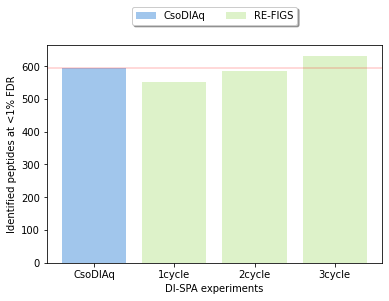

In [35]:
dirname="../result/"
file1=[
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_corrected_peptideFDR.csv",
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_correctedNoFilter_withFeature_3cycle_7_1_LDA_ID.csv",
]
file2=[
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_corrected_peptideFDR.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_correctedNoFilter_withFeature_3cycle_7_1_LDA_ID.csv",
]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1_1=[]
samplelist2_1=[]
for filename in file1:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1_1.append(sample['peptide'])
# print(len(sample1))
for filename in file2:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2_1.append(sample['peptide'])
# print(len(sample2))
# print("CsoDIAq: ",num1,len(sample1))
# print("RE-FIGS: ",num2,len(sample2))
num3_1=[int((num1[i]+num2[i])/2) for i in range(len(num1))]
print(num1,num2)
print(num3_1)

plt.bar(range(1,2),num3_1[:1],label='CsoDIAq',color = '#A1C6EC')
plt.bar(range(2,5),num3_1[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
plt.xticks(range(1,5),new_ticks)
# plt.ylim(0,8300)
plt.xlabel('DI-SPA experiments')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=2)
plt.axhline(y=num3_1[0],ls="-",c="red", linewidth=0.3)#添加水平直线
plt.show()

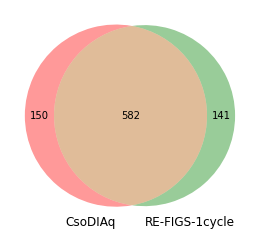

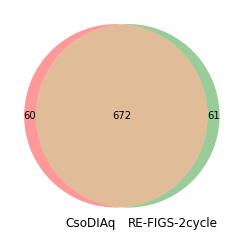

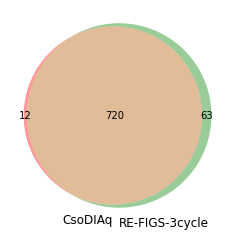

In [36]:
for i in range(1,4):
    venn2([set(samplelist1_1[0])|set(samplelist2_1[0]),set(samplelist1_1[i])|set(samplelist2_1[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"])
    plt.show()

[814, 638, 807, 869] [952, 847, 949, 1019]
[883, 742, 878, 944]


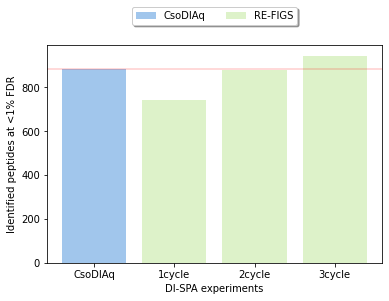

In [37]:
dirname="../result/"
file1=[
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_corrected_peptideFDR.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_correctedNoFilter_withFeature_2cycle_8_3_LDA_ID.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
]
file2=[
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_corrected_peptideFDR.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_correctedNoFilter_withFeature_2cycle_8_3_LDA_ID.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1_2=[]
samplelist2_2=[]
for filename in file1:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1_2.append(sample['peptide'])
# print(len(sample1))
for filename in file2:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2_2.append(sample['peptide'])
# print(len(sample2))
# print("CsoDIAq: ",num1,len(sample1))
# print("RE-FIGS: ",num2,len(sample2))
num3_2=[int((num1[i]+num2[i])/2) for i in range(len(num1))]
print(num1,num2)
print(num3_2)

plt.bar(range(1,2),num3_2[:1],label='CsoDIAq',color = '#A1C6EC')
plt.bar(range(2,5),num3_2[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
plt.xticks(range(1,5),new_ticks)
# plt.ylim(0,8300)
plt.xlabel('DI-SPA experiments')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=2)
plt.axhline(y=num3_2[0],ls="-",c="red", linewidth=0.3)#添加水平直线
plt.show()

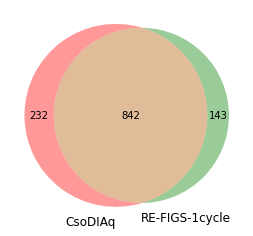

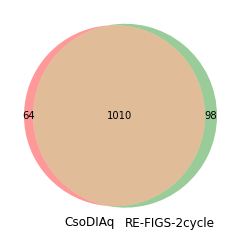

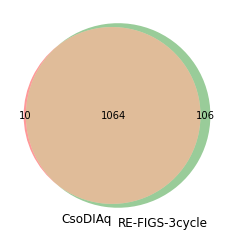

In [38]:
for i in range(1,4):
    venn2([set(samplelist1_2[0])|set(samplelist2_2[0]),set(samplelist1_2[i])|set(samplelist2_2[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"])
    plt.show()

[1015, 835, 811, 1048] [1167, 1079, 1324, 1307]
[1091, 957, 1067, 1177]


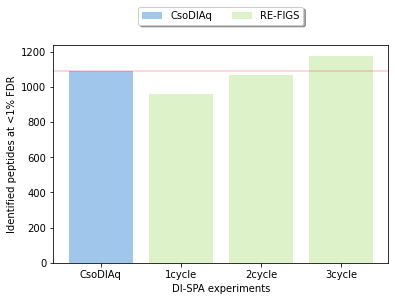

In [39]:
dirname="../result/"
file1=[
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_corrected_peptideFDR.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_correctedNoFilter_withFeature_2cycle_9_9_LDA_ID.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
]
file2=[
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_corrected_peptideFDR.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_correctedNoFilter_withFeature_2cycle_9_9_LDA_ID.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1_3=[]
samplelist2_3=[]
for filename in file1:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1_3.append(sample['peptide'])
# print(len(sample1))
for filename in file2:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2_3.append(sample['peptide'])
# print(len(sample2))
# print("CsoDIAq: ",num1,len(sample1))
# print("RE-FIGS: ",num2,len(sample2))
num3_3=[int((num1[i]+num2[i])/2) for i in range(len(num1))]
print(num1,num2)
print(num3_3)

plt.bar(range(1,2),num3_3[:1],label='CsoDIAq',color = '#A1C6EC')
plt.bar(range(2,5),num3_3[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
plt.xticks(range(1,5),new_ticks)
# plt.ylim(0,8300)
plt.xlabel('DI-SPA experiments')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=2)
plt.axhline(y=num3_3[0],ls="-",c="red", linewidth=0.3)#添加水平直线
plt.show()

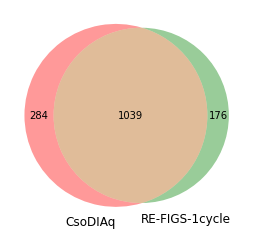

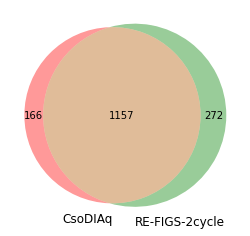

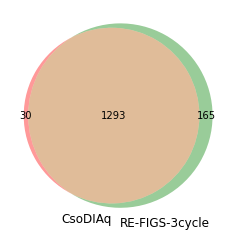

In [40]:
for i in range(1,4):
    venn2([set(samplelist1_3[0])|set(samplelist2_3[0]),set(samplelist1_3[i])|set(samplelist2_3[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"])
    plt.show()

[1104, 720, 1128] [1245, 1055, 1528]
[1174, 887, 1328]


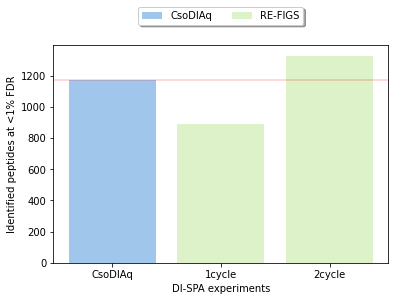

In [41]:
dirname="../result/"
file1=[
"CsoDIAq-file7_20190405_MCF7_FAIMS_04_1_corrected_peptideFDR.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_04_1_correctedNoFilter_withFeature_1cycle_7_1_LDA_ID.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_04_1_correctedNoFilter_withFeature_2cycle_8_1_LDA_ID.csv",
]
file2=[
"CsoDIAq-file8_20190405_MCF7_FAIMS_04_2_corrected_peptideFDR.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_04_2_correctedNoFilter_withFeature_1cycle_7_1_LDA_ID.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_04_2_correctedNoFilter_withFeature_2cycle_8_1_LDA_ID.csv",
]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1_4=[]
samplelist2_4=[]
for filename in file1:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1_4.append(sample['peptide'])
# print(len(sample1))
for filename in file2:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']!='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2_4.append(sample['peptide'])
# print(len(sample2))
# print("CsoDIAq: ",num1,len(sample1))
# print("RE-FIGS: ",num2,len(sample2))
num3_4=[int((num1[i]+num2[i])/2) for i in range(len(num1))]
print(num1,num2)
print(num3_4)

plt.bar(range(1,2),num3_4[:1],label='CsoDIAq',color = '#A1C6EC')
plt.bar(range(2,4),num3_4[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle']
plt.xticks(range(1,4),new_ticks)
# plt.ylim(0,8300)
plt.xlabel('DI-SPA experiments')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=2)
plt.axhline(y=num3_4[0],ls="-",c="red", linewidth=0.3)#添加水平直线
plt.show()

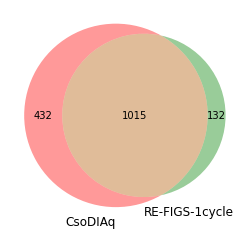

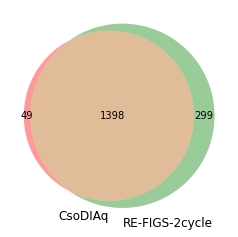

In [42]:
for i in range(1,3):
    venn2([set(samplelist1_4[0])|set(samplelist2_4[0]),set(samplelist1_4[i])|set(samplelist2_4[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"])
    plt.show()

In [43]:
num_csodiaq=[]
num_csodiaq.append(num3_1[0])
num_csodiaq.append(num3_2[0])
num_csodiaq.append(num3_3[0])
num_csodiaq.append(num3_4[0])
num_1cycle=[]
num_1cycle.append(num3_1[1])
num_1cycle.append(num3_2[1])
num_1cycle.append(num3_3[1])
num_1cycle.append(num3_4[1])
num_2cycle=[]
num_2cycle.append(num3_1[2])
num_2cycle.append(num3_2[2])
num_2cycle.append(num3_3[2])
num_2cycle.append(num3_4[2])
num_3cycle=[]
num_3cycle.append(num3_1[3])
num_3cycle.append(num3_2[3])
num_3cycle.append(num3_3[3])

In [44]:
num_csodiaq

[595, 883, 1091, 1174]

In [45]:
num_1cycle

[552, 742, 957, 887]

In [46]:
num_2cycle

[584, 878, 1067, 1328]

In [47]:
num_3cycle

[632, 944, 1177]

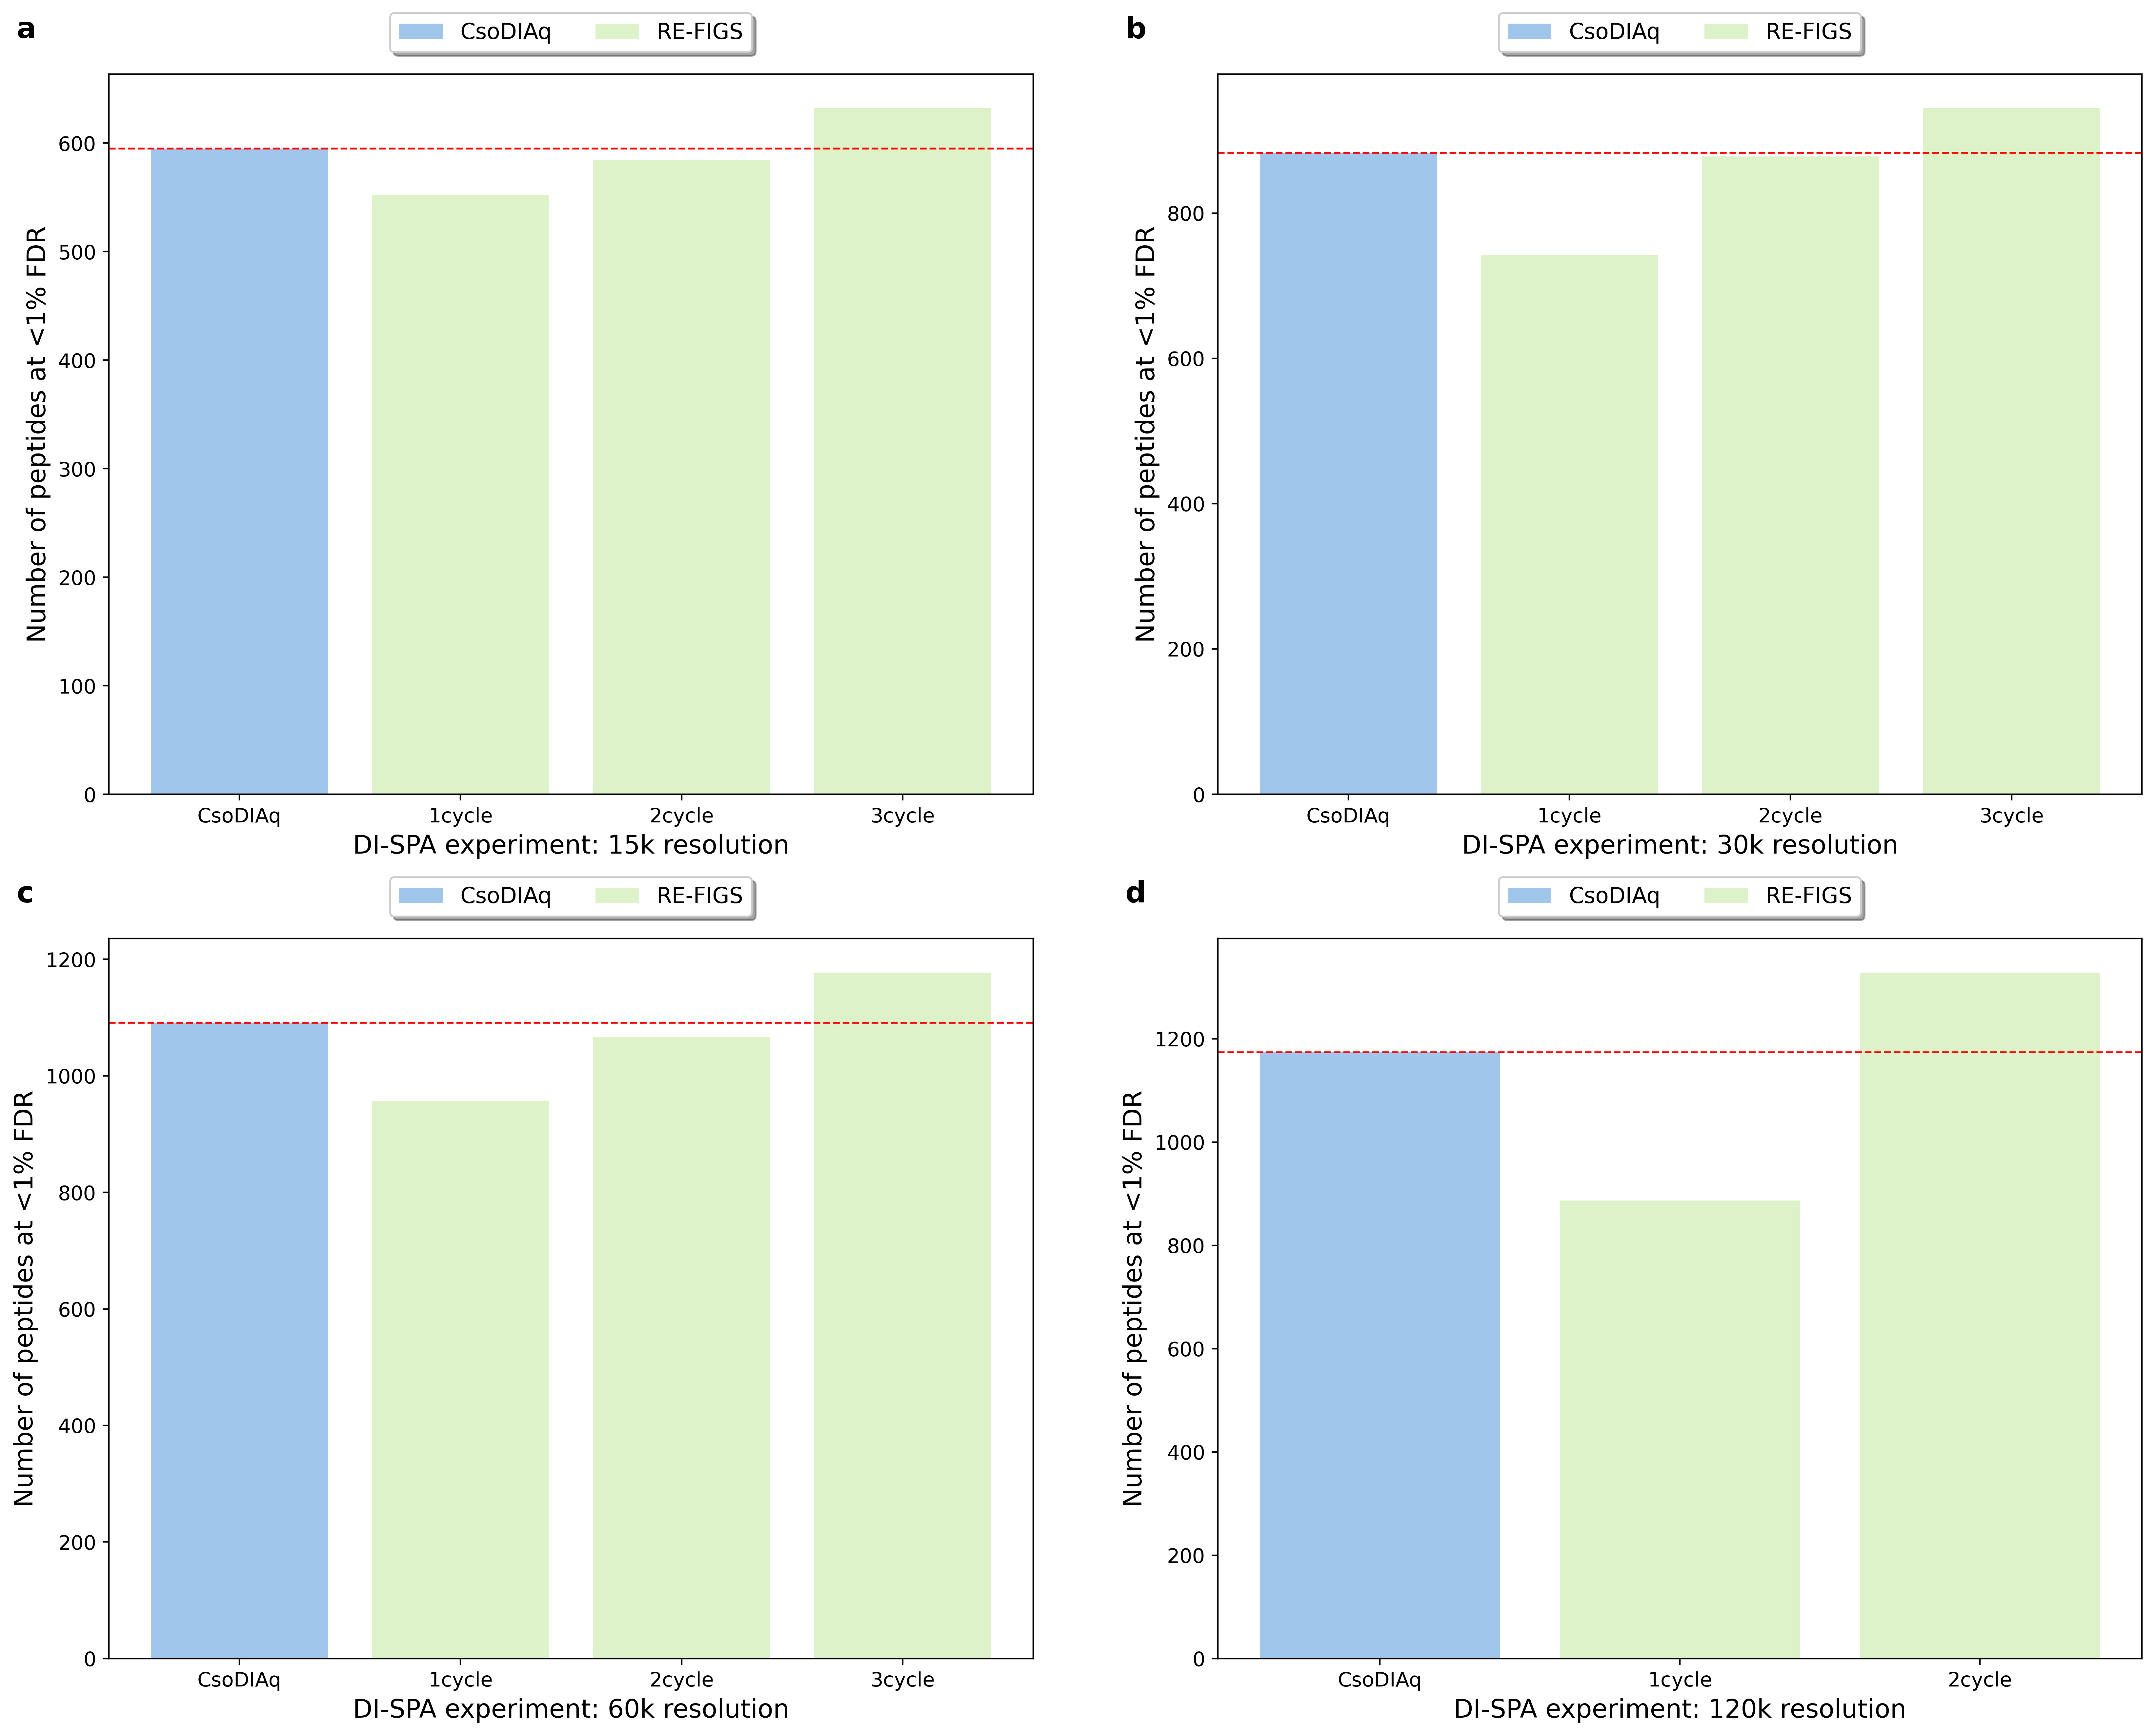

In [48]:
fig, axs = plt.subplots(2,2,figsize=(20,20*0.8),dpi=400)

###################
axs[0][0].bar(range(1,2),num3_1[:1],label='CsoDIAq',color = '#A1C6EC')
axs[0][0].bar(range(2,5),num3_1[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
axs[0][0].set_xticks(range(1,5),new_ticks)
axs[0][0].set_xlabel('DI-SPA experiment: 15k resolution',fontsize=14)
axs[0][0].set_ylabel('Number of peptides at <1% FDR',fontsize=14)
axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=12)
axs[0][0].axhline(y=num3_1[0],ls="--",c="red", linewidth=1)#添加水平直线
axs[0][0].tick_params(labelsize=11)

################
axs[0][1].bar(range(1,2),num3_2[:1],label='CsoDIAq',color = '#A1C6EC')
axs[0][1].bar(range(2,5),num3_2[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
axs[0][1].set_xticks(range(1,5),new_ticks)
axs[0][1].set_xlabel('DI-SPA experiment: 30k resolution',fontsize=14)
axs[0][1].set_ylabel('Number of peptides at <1% FDR',fontsize=14)
axs[0][1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=12)
axs[0][1].axhline(y=num3_2[0],ls="--",c="red", linewidth=1)#添加水平直线
axs[0][1].tick_params(labelsize=11)

##########
axs[1][0].bar(range(1,2),num3_3[:1],label='CsoDIAq',color = '#A1C6EC')
axs[1][0].bar(range(2,5),num3_3[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle', '3cycle']
axs[1][0].set_xticks(range(1,5),new_ticks)
axs[1][0].set_xlabel('DI-SPA experiment: 60k resolution',fontsize=14)
axs[1][0].set_ylabel('Number of peptides at <1% FDR',fontsize=14)
axs[1][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=12)
axs[1][0].axhline(y=num3_3[0],ls="--",c="red", linewidth=1)#添加水平直线
axs[1][0].tick_params(labelsize=11)

###########
axs[1][1].bar(range(1,2),num3_4[:1],label='CsoDIAq',color = '#A1C6EC')
axs[1][1].bar(range(2,4),num3_4[1:],label='RE-FIGS',color='#DDF2C9')
new_ticks = ['CsoDIAq', '1cycle','2cycle']
axs[1][1].set_xticks(range(1,4),new_ticks)
axs[1][1].set_xlabel('DI-SPA experiment: 120k resolution',fontsize=14)
axs[1][1].set_ylabel('Number of peptides at <1% FDR',fontsize=14)
axs[1][1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=12)
axs[1][1].axhline(y=num3_4[0],ls="--",c="red", linewidth=1)#添加水平直线
axs[1][1].tick_params(labelsize=11)

###############
axs = axs.flat
for n, ax in enumerate(axs):  
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
# plt.savefig('fig4.pdf')

In [49]:
dirname = "../result/"

In [50]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [51]:
filenames = [
    "CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_corrected_peptideFDR.csv",
    "CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_corrected_peptideFDR.csv",
    "CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_corrected_peptideFDR.csv",
    "CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_corrected_peptideFDR.csv",
    "CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_corrected_peptideFDR.csv",
    "CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_corrected_peptideFDR.csv",
    "CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_corrected_peptideFDR.csv",
    "CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_corrected_peptideFDR.csv",
    "CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_corrected_peptideFDR.csv",
    "CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_corrected_peptideFDR.csv",
    "CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_corrected_peptideFDR.csv",
    "CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_corrected_peptideFDR.csv",
]

In [52]:
counts = []
total = pd.DataFrame([])
for filename in filenames:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['peptide'].apply(peptide_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    trap = csodiaq_id_df[csodiaq_id_df['protein']=='TRAP']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']=='DECOY_null']
    counts.append(len(sample))
    total=pd.concat([total,sample])

In [53]:
csodiaq_mean=np.mean(counts)

In [54]:
csodiaq_mean

5831.25

In [55]:
peptides = set(total['peptide'].values)
peptide_counts = []
good = []
for pep in tqdm(peptides):
    tmp = total[total['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=10:
        good.append(pep)
csodiaq_count10 = 0
for key in peptide_counts:
    if key>=10:
        csodiaq_count10+=1

100%|██████████| 9410/9410 [00:32<00:00, 293.10it/s]


In [56]:
len(good)

4662

In [57]:
csodiaq_count10

4662

In [58]:
names = locals()
counts_above10 = []
for i in range(1,14,1):
    print(i)
    names['filenames_'+str(i)] = [
        "CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
        "CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_correctedNoFilter_withFeature_"+str(i)+"cycle_7_5_LDA_ID.csv",
    ]
    names['counts_'+str(i)] = []
    names['total_'+str(i)] = pd.DataFrame([])
    for filename in names['filenames_'+str(i)]:
        our_id_df = pd.read_csv(os.path.join(dirname,filename))
        our_id_df['protein'] = our_id_df['peptide'].apply(peptide_type)
        sample = our_id_df[our_id_df['protein']=='SAMPLE']
        trap = our_id_df[our_id_df['protein']=='TRAP']
        decoy = our_id_df[our_id_df['protein']=='DECOY_null']
        names['counts_'+str(i)].append(len(sample))
        names['total_'+str(i)]=pd.concat([names['total_'+str(i)],sample])
    
    peptides = set(names['total_'+str(i)]['peptide'].values)
    peptide_counts = []
    new_good = []
    for pep in tqdm(peptides):
        tmp = names['total_'+str(i)][names['total_'+str(i)]['peptide']==pep]
        peptide_counts.append(len(tmp))
        if len(tmp)>=10:
            new_good.append(pep)
            
    count = 0
    for key in peptide_counts:
        if key>=10:
            count+=1
    counts_above10.append(count)

1


100%|██████████| 13222/13222 [00:41<00:00, 321.25it/s]


2


100%|██████████| 13792/13792 [00:48<00:00, 281.86it/s]


3


100%|██████████| 13657/13657 [00:47<00:00, 285.66it/s]


4


100%|██████████| 13750/13750 [00:48<00:00, 283.71it/s]


5


100%|██████████| 13850/13850 [00:43<00:00, 320.75it/s]


6


100%|██████████| 13754/13754 [00:40<00:00, 340.99it/s]


7


100%|██████████| 13790/13790 [00:40<00:00, 336.47it/s]


8


100%|██████████| 13747/13747 [00:40<00:00, 340.75it/s]


9


100%|██████████| 13742/13742 [00:40<00:00, 340.88it/s]


10


100%|██████████| 13765/13765 [00:40<00:00, 338.91it/s]


11


100%|██████████| 13869/13869 [00:41<00:00, 336.64it/s]


12


100%|██████████| 13901/13901 [00:41<00:00, 336.41it/s]


13


100%|██████████| 14142/14142 [00:42<00:00, 330.93it/s]


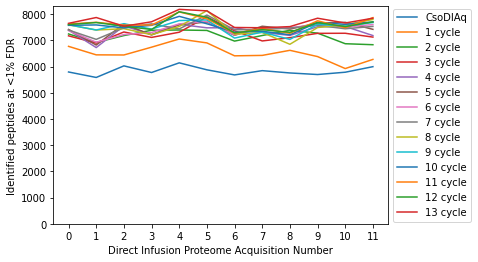

In [59]:
x = np.linspace(0, 11, 12)
y = counts

plt.plot(x,y,label = 'CsoDIAq')
#plt.scatter(range(len(names['counts_'+str(i)])),names['counts_'+str(i)])

    
for i in range(1,14,1):
    x = np.linspace(0, 11, 12)
    y = names['counts_'+str(i)]

    plt.plot(x,y,label = str(i)+' cycle')
    #plt.scatter(range(len(names['counts_'+str(i)])),names['counts_'+str(i)])
    
plt.xlabel('Direct Infusion Proteome Acquisition Number')
plt.ylabel('Identified peptides at <1% FDR')
new_ticks = np.linspace(0,11,12)
plt.xticks(new_ticks)
plt.ylim(0,8300)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [60]:
y_upper_error = []
y_lower_error = []
y_mean = []
for i in range(1,14,1):
    x = np.linspace(0, 11, 12)
    y = names['counts_'+str(i)]
    y_mean.append(np.mean(y))
    y_upper_error.append(np.max(y)-np.mean(y))
    y_lower_error.append(np.mean(y)-np.min(y))

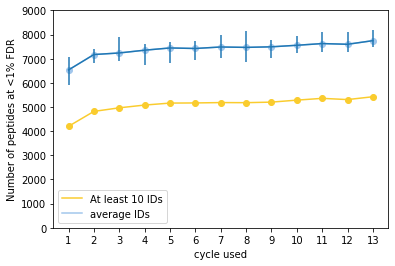

In [61]:
plt.plot(np.linspace(1,13,13),counts_above10,color='#FACC2E',label='At least 10 IDs')
plt.scatter(np.linspace(1,13,13),counts_above10,color='#FACC2E')
plt.xlabel('cycle used')
# plt.ylabel('At least 8/12 identification peptides at <1% FDR')
plt.ylabel('Number of peptides at <1% FDR')
new_ticks = np.linspace(1,13,13)
plt.xticks(new_ticks)
plt.ylim(0,9000)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=7)

plt.plot(np.linspace(1,13,13),y_mean,color = '#A1C6EC',label='average IDs')
plt.scatter(np.linspace(1,13,13),y_mean,color='#A1C6EC',alpha=1)
plt.errorbar(np.linspace(1,13,13),y_mean,yerr=[y_lower_error,y_upper_error])
plt.legend()
plt.show()

In [62]:
len(good)

4662

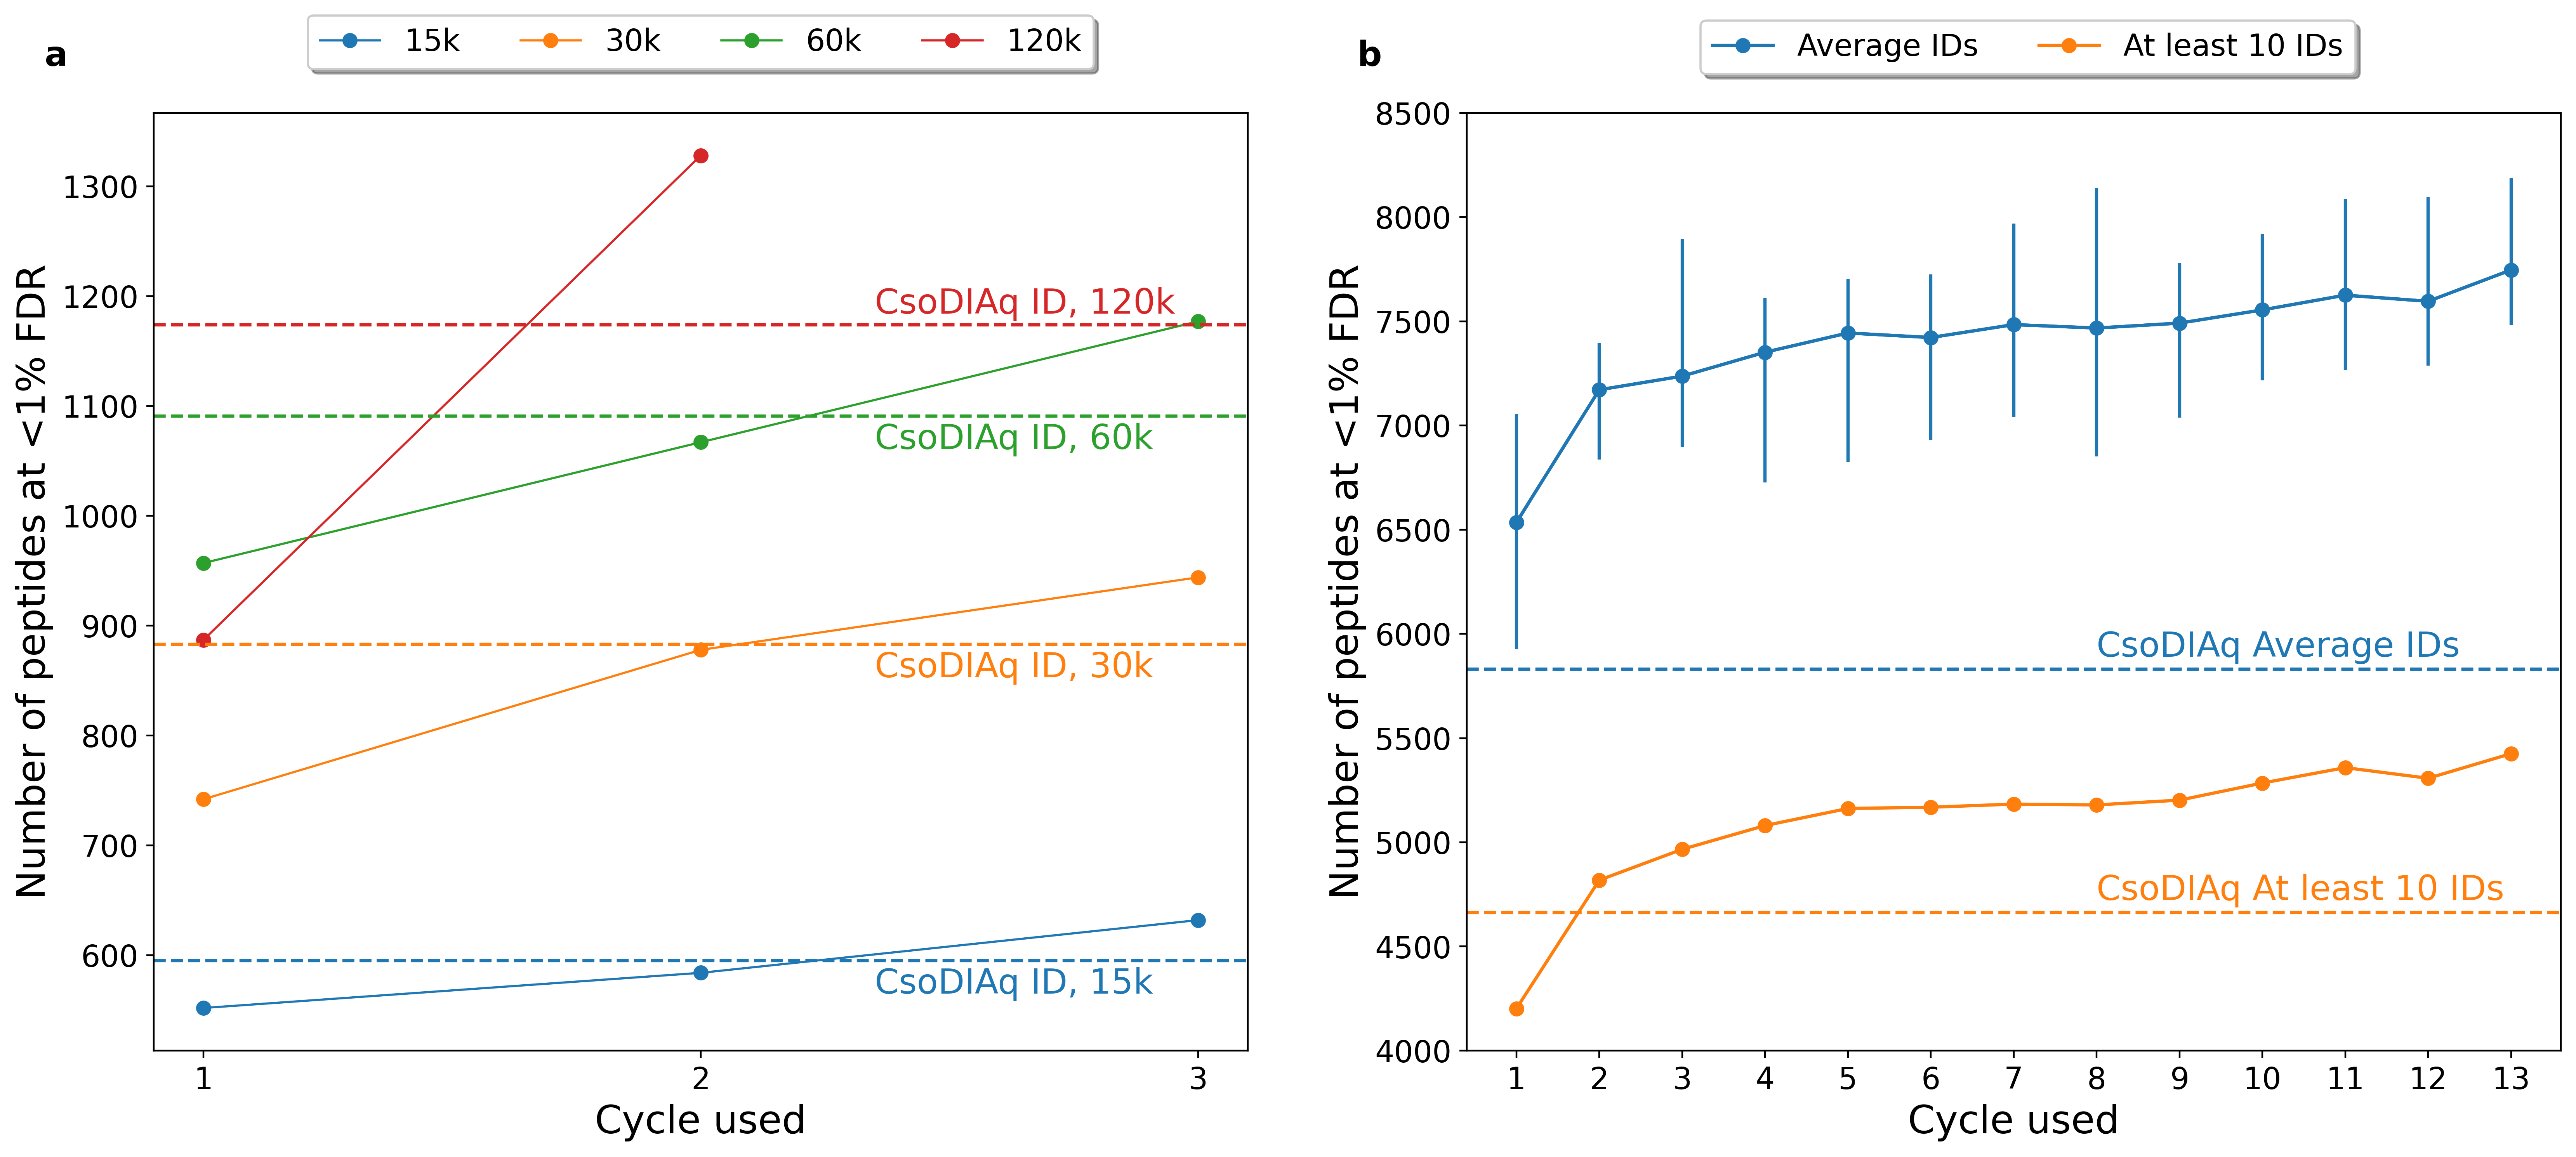

In [63]:
# fig, axs = plt.subplots(1,3,figsize=(21*1.5,1.5*14*(1-0.618))) old
fig, axs = plt.subplots(1,2,figsize=(20,8),dpi=400)

###################
# x_axis_data=[1,2,3,4]
# x_axis_data_special=[1,2,3]
# axs[0].plot(x_axis_data, num3_1, 'o-', alpha=1, linewidth=1, label='15k')
# axs[0].plot(x_axis_data, num3_2, 'o-', alpha=1, linewidth=1, label='30k')
# axs[0].plot(x_axis_data, num3_3, 'o-', alpha=1, linewidth=1, label='60k')
# axs[0].plot(x_axis_data_special, num3_4, 'o-', alpha=1, linewidth=1,label='120k')

# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=4,fontsize=14)

# axs[0].tick_params(labelsize=14)
# x = range(1, 5)
# axs[0].set_xticks(x, ('CsoDIAq', 'RE-FIGS-1cycle', 'RE-FIGS-2cycle', 'RE-FIGS-3cycle'))
# axs[0].set_xlabel('Qualitative method and number of cycles used',fontsize=18)
# axs[0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)

x_axis_data=[1,2,3]
x_axis_data_special=[1,2]
axs[0].plot(x_axis_data, num3_1[1:], 'o-', alpha=1, linewidth=1, label='15k')
axs[0].plot(x_axis_data, num3_2[1:], 'o-', alpha=1, linewidth=1, label='30k')
axs[0].plot(x_axis_data, num3_3[1:], 'o-', alpha=1, linewidth=1, label='60k')
axs[0].plot(x_axis_data_special, num3_4[1:], 'o-', alpha=1, linewidth=1,label='120k')
axs[0].axhline(y=num3_1[0],ls="--",color='#1f77b4')
axs[0].axhline(y=num3_2[0],ls="--",color='#ff7f0e')
axs[0].axhline(y=num3_3[0],ls="--",color='#2ca02c')
axs[0].axhline(y=num3_4[0],ls="--",color='#d62728')
axs[0].text(2.35, num3_1[0]-30, "CsoDIAq ID, 15k", fontsize=16,color='#1f77b4')
axs[0].text(2.35, num3_2[0]-30, "CsoDIAq ID, 30k", fontsize=16,color='#ff7f0e')
axs[0].text(2.35, num3_3[0]-30, "CsoDIAq ID, 60k", fontsize=16,color='#2ca02c')
axs[0].text(2.35, num3_4[0]+10, "CsoDIAq ID, 120k", fontsize=16,color='#d62728')

axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=4,fontsize=14)

axs[0].tick_params(labelsize=14)
new_ticks = np.linspace(1,3,3)
axs[0].set_xticks(new_ticks)
axs[0].set_xlabel('Cycle used',fontsize=18)
axs[0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)

###################
# x = np.linspace(1, 12, 12)
# y = counts
# axs[1].plot(x,y,label = 'CsoDIAq')

# for i in range(1,14,1):
#     x = np.linspace(1, 12, 12)
#     y = names['counts_'+str(i)]
#     axs[1].plot(x,y,label = str(i)+' cycle')

# axs[1].set_xlabel('DI-SPA experiments',fontsize=18)
# axs[1].set_ylabel('Number of peptides at <1% FDR',fontsize=18)
# axs[1].tick_params(labelsize=14)
# new_ticks = np.linspace(1,12,12)
# axs[1].set_xticks(new_ticks)
# axs[1].set_ylim(0,8300)
# axs[1].legend(loc='center left', bbox_to_anchor=(0.77, 0.35),fontsize=12)


################
axs[1].plot(np.linspace(1,13,13),y_mean,'o-',color = '#1f77b4',label='Average IDs')
# axs[1].scatter(np.linspace(1,13,13),y_mean,color='#1f77b4',alpha=1)
axs[1].errorbar(np.linspace(1,13,13),y_mean,yerr=[y_lower_error,y_upper_error])
axs[1].plot(np.linspace(1,13,13),counts_above10,'o-',color='#ff7f0e',label='At least 10 IDs')
# axs[1].scatter(np.linspace(1,13,13),counts_above10,color='#ff7f0e')
axs[1].text(8, csodiaq_mean+60, "CsoDIAq Average IDs", fontsize=16,color = '#1f77b4')
axs[1].text(8, csodiaq_count10+60, "CsoDIAq At least 10 IDs", fontsize=16,color='#ff7f0e')
axs[1].set_xlabel('Cycle used',fontsize=18)
axs[1].set_ylabel('Number of peptides at <1% FDR',fontsize=18)
axs[1].tick_params(labelsize=14)
new_ticks = np.linspace(1,13,13)
axs[1].set_xticks(new_ticks)
# axs[1].set_ylim(0,9000)
axs[1].set_ylim(4000,8500)

axs[1].axhline(y=csodiaq_mean,ls="--",color = '#1f77b4')
axs[1].axhline(y=csodiaq_count10,ls="--",color='#ff7f0e')

axs[1].legend(loc='center left', bbox_to_anchor=(0.2, 1.07),fancybox=True, shadow=True, ncol=2,fontsize=14)


axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('fig3.jpg')

In [64]:
fig, axs = plt.subplots(4,3,figsize=(30,2*20*0.8),dpi=400)

###################
for i in range(1,4):
    v1=venn2([set(samplelist1_1[0])&set(samplelist2_1[0]),set(samplelist1_1[i])&set(samplelist2_1[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"],ax = axs[0][i-1])
    axs[0][i-1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True,ncol=2,fontsize=14)
    for t in v1.set_labels:
        t.set_fontsize(22)
    for t in v1.subset_labels:
        t.set_fontsize(20)
axs[0][0].text(0.1, -0.75, "15k resolution", ha='center', va='bottom', fontsize=24)
axs[0][1].text(0.1, -0.78, "15k resolution", ha='center', va='bottom', fontsize=24)
axs[0][2].text(0.1, -0.8, "15k resolution", ha='center', va='bottom', fontsize=24)

################
for i in range(1,4):
    v1=venn2([set(samplelist1_2[0])&set(samplelist2_2[0]),set(samplelist1_2[i])&set(samplelist2_2[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"],ax = axs[1][i-1])
    axs[1][i-1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True,ncol=2,fontsize=14)
    for t in v1.set_labels:
        t.set_fontsize(22)
    for t in v1.subset_labels:
        t.set_fontsize(20)
axs[1][0].text(0.1, -0.76, "30k resolution", ha='center', va='bottom', fontsize=24)
axs[1][1].text(0.1, -0.79, "30k resolution", ha='center', va='bottom', fontsize=24)
axs[1][2].text(0.1, -0.81, "30k resolution", ha='center', va='bottom', fontsize=24)

##########
for i in range(1,4):
    v1=venn2([set(samplelist1_3[0])&set(samplelist2_3[0]),set(samplelist1_3[i])&set(samplelist2_3[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"],ax = axs[2][i-1])
    axs[2][i-1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True,ncol=2,fontsize=14)
    for t in v1.set_labels:
        t.set_fontsize(22)
    for t in v1.subset_labels:
        t.set_fontsize(20)
axs[2][0].text(0.1, -0.77, "60k resolution", ha='center', va='bottom', fontsize=24)
axs[2][1].text(0.1, -0.8, "60k resolution", ha='center', va='bottom', fontsize=24)
axs[2][2].text(0.1, -0.82, "60k resolution", ha='center', va='bottom', fontsize=24)

###########
for i in range(1,3):
    v1=venn2([set(samplelist1_4[0])&set(samplelist2_4[0]),set(samplelist1_4[i])&set(samplelist2_4[i])],['CsoDIAq','RE-FIGS-'+str(i)+"cycle"],ax = axs[3][i-1])
    axs[3][i-1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True,ncol=2,fontsize=14)
    for t in v1.set_labels:
        t.set_fontsize(22)
    for t in v1.subset_labels:
        t.set_fontsize(20)
axs[3][0].text(0.1, -0.78, "120k resolution", ha='center', va='bottom', fontsize=24)
axs[3][1].text(0.1, -0.81, "120k resolution", ha='center', va='bottom', fontsize=24)
plt.delaxes(axs[3,2])

axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('supplement4.jpg')